<a href="https://colab.research.google.com/github/chethu-10102003/stock-prediction/blob/main/NVIDIA_Stock_Price_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NVIDIA Stock Price Forecasting**
> 🤔 In this project we are going to develop a Deep Learning Model `NvidiaNET` that will be predicting on NVIDIA stock previous 20 years of data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

## Loading, Exploring and Visualizing Data

In [4]:
df = pd.read_csv('NVDA.csv')

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-08-25,1.550833,1.550833,1.500000,1.513333,1.388485,43402800
1,2003-08-26,1.494167,1.516667,1.448333,1.489167,1.366313,76898400
2,2003-08-27,1.499167,1.550000,1.483333,1.534167,1.407600,56781600
3,2003-08-28,1.549167,1.557500,1.476667,1.494167,1.370901,82831200
4,2003-08-29,1.491667,1.520833,1.485833,1.514167,1.389251,53288400


In [6]:
df.shape

(5035, 7)

In [7]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5030,2023-08-18,426.350006,435.779999,416.600006,432.989990,432.989990,58262200
5031,2023-08-21,444.940002,470.649994,442.220001,469.670013,469.670013,69257300
5032,2023-08-22,481.350006,481.869995,453.329987,456.679993,456.679993,75720700
5033,2023-08-23,458.660004,472.000000,452.079987,471.160004,471.160004,77904600
5034,2023-08-24,502.160004,502.660004,471.589996,471.630005,471.630005,115274400


In [8]:
## convert our Date to datetime object
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-08-25,1.550833,1.550833,1.500000,1.513333,1.388485,43402800
1,2003-08-26,1.494167,1.516667,1.448333,1.489167,1.366313,76898400
2,2003-08-27,1.499167,1.550000,1.483333,1.534167,1.407600,56781600
3,2003-08-28,1.549167,1.557500,1.476667,1.494167,1.370901,82831200
4,2003-08-29,1.491667,1.520833,1.485833,1.514167,1.389251,53288400


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5035 non-null   datetime64[ns]
 1   Open       5035 non-null   float64       
 2   High       5035 non-null   float64       
 3   Low        5035 non-null   float64       
 4   Close      5035 non-null   float64       
 5   Adj Close  5035 non-null   float64       
 6   Volume     5035 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 275.5 KB


<Axes: title={'center': 'NVIDIA Stock Close Price'}>

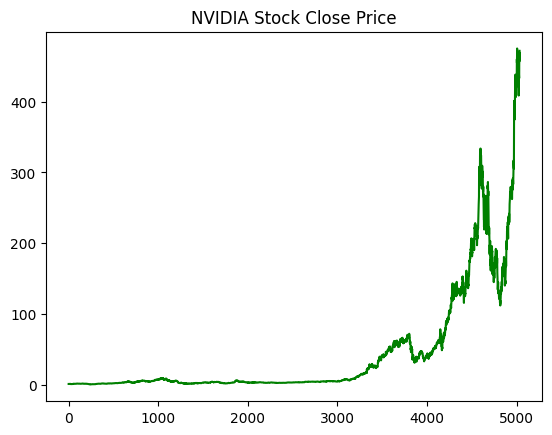

In [11]:
plt.grid()
df['Close'].plot(title='NVIDIA Stock Close Price', color='green')

In [12]:
X = df['Close']

In [13]:
X

,Close
0,1.513333
1,1.489167
2,1.534167
3,1.494167
4,1.514167
...,...
5030,432.989990
5031,469.670013
5032,456.679993
5033,471.160004


In [14]:
X.shape

(5035,)

## MinMax Scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(np.array(X).reshape(-1, 1))

In [16]:
X_scaled

array([[0.00153431],
       [0.00148334],
       [0.00157825],
       ...,
       [0.9614893 ],
       [0.99202791],
       [0.99301915]])

## Performing Training and Testing Splits

In [17]:
def time_series_splits(data, train_size:float):
  train_size = int(len(data)*train_size)
  train_data = data[:train_size]
  test_data = data[train_size:]
  return train_data, test_data

In [18]:
train_data, test_data = time_series_splits(X_scaled, 0.95)

In [19]:
train_data.shape, test_data.shape

((4783, 1), (252, 1))

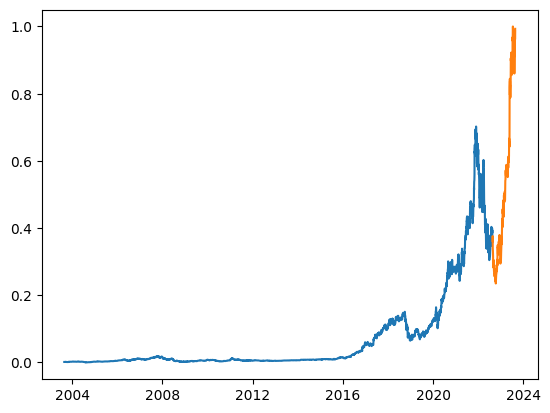

In [20]:
## visualizing our data
plt.plot(df['Date'][:4783], train_data)
plt.plot(df['Date'][4783:], test_data)

## Converting into Windows and Horizons
> We want to convert our data like this :
* [1, 2, 3, 4, 5, 6, 7] -> [8]
* [2, 3, 4, 5 ,6, 7, 8] -> [9]

In [21]:
def to_sequences(data, window_size=7, horizon=1):
  X = []
  y = []
  for i in range(len(data)-(window_size+horizon)):
    X.append(data[i:i+window_size, 0])
    y.append(data[i+window_size, 0])

  return np.array(X), np.array(y)

In [22]:
trainX, trainY = to_sequences(train_data, window_size=7, horizon=1)
testX, testY = to_sequences(test_data, window_size=7, horizon=1)

In [23]:
trainX.shape

(4775, 7)

In [24]:
trainX[0]

array([0.00153431, 0.00148334, 0.00157825, 0.00149389, 0.00153607,
       0.00150795, 0.00144644])

In [25]:
trainY[0]

0.0014763130765597045

In [26]:
print(f'Train X : {scaler.inverse_transform(trainX[-1].reshape(-1, 1))}')
print(f'Train Y : {scaler.inverse_transform(trainY[-1].reshape(-1, 1))}')

Train X : [[179.419998]
 [187.089996]
 [190.320007]
 [188.789993]
 [183.350006]
 [187.729996]
 [178.490005]]
Train Y : [[170.339996]]


In [27]:
trainX.shape, trainY.shape, testX.shape, testY.shape

((4775, 7), (4775,), (244, 7), (244,))

In [28]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [29]:
trainX.shape, testX.shape

((4775, 1, 7), (244, 1, 7))

## Setting up callbacks

In [30]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [31]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

## Modelling Experiments

In [32]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense, Conv1D, MaxPooling1D, Flatten, Dropout

In [33]:
# Model 1
lstm_model = Sequential()
lstm_model.add(LSTM(128, activation='tanh', return_sequences=True))
lstm_model.add(LSTM(128, activation='tanh'))
lstm_model.add(Dense(128, activation='relu'))
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dense(1, activation='linear'))

# compile model
lstm_model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mse']
)

In [35]:
import os
import tensorflow as tf
# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name) + ".keras", # add the .keras extension to the filepath
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [36]:
history_lstm = lstm_model.fit(trainX, trainY,
                              epochs=50,
                              validation_data=(testX, testY),
                              callbacks=[create_tensorboard_callback(dir_name='NVIDIA STOCK Price',
                                                                     experiment_name='LSTM Model'),
                                         create_model_checkpoint(model_name='LSTM_model')])

Saving TensorBoard log files to: NVIDIA STOCK Price/LSTM Model/20240911-090151
Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.4257e-05 - mse: 9.4257e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.0488e-05 - mse: 9.0488e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.9359e-05 - mse: 9.9359e-05 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.8463e-05 - mse: 6.8463e-05 - val_loss: 8.1205e-04 - val_mse: 8.1205e-04
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.2574e-05 - mse: 8.2574e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.6673e-05 - mse: 5.6673e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━

In [37]:
lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 128)              │          69,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 684,293 (2.61 MB)

 Trainable params: 228,097 (891.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 456,196 (1.74 MB)

## Evaluating our different Modelling Experiments

In [38]:
lstm_model.evaluate(testX, testY)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7702e-04 - mse: 3.7702e-04 


[0.0007769611547701061, 0.0007769611547701061]

In [41]:
# Use the tf.keras.models.load_model function with the correct file extension.
lstm_model = tf.keras.models.load_model('/content/model_experiments/LSTM_model.keras')

# Evaluate the loaded model.
lstm_model.evaluate(testX, testY)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.0897e-04 - mse: 3.0897e-04  


[0.0004566543793771416, 0.0004566543793771416]

In [42]:
lstm_model.evaluate(trainX, trainY)

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.3170e-06 - mse: 8.3170e-06


[4.037924372823909e-05, 4.037924372823909e-05]

In [43]:
y_preds = lstm_model.predict(testX)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [44]:
train_y_preds = lstm_model.predict(trainX)

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [45]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy()}

## Visualizing our data

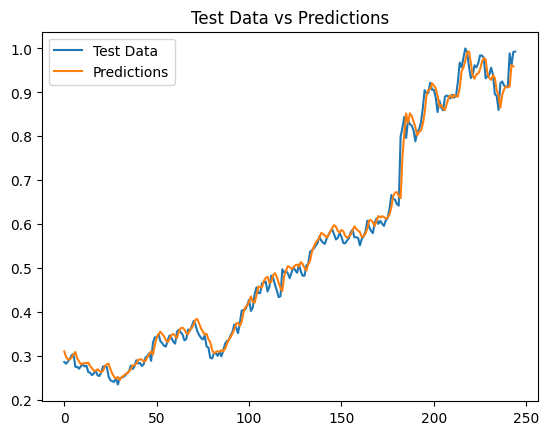

In [49]:
## visualizing our data
plt.plot(test_data[7:len(df)-(7+1)], label='Test Data')
plt.plot(y_preds, label='Predictions')
plt.legend()
plt.title('Test Data vs Predictions')
plt.show()

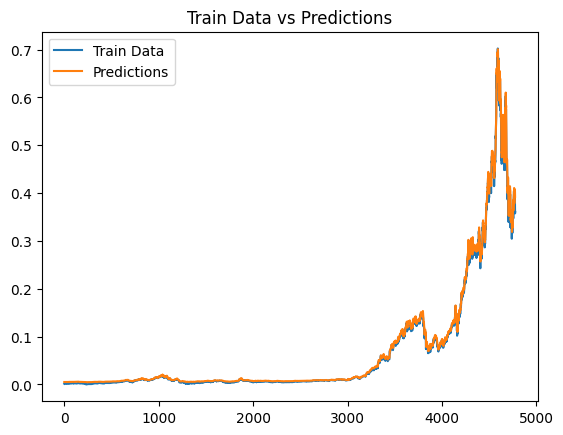

In [50]:
## visualizing our data
plt.plot(train_data[7:len(df)-(7+1)], label='Train Data')
plt.plot(train_y_preds, label='Predictions')
plt.legend()
plt.title('Train Data vs Predictions')
plt.show()

## Viewing our model's training results in TensorBoard

## Future Forecasting

In [52]:
inputs = testX[-1]
inputs, inputs.shape

(array([[0.9211016 , 0.92504546, 0.9154705 , 0.91247572, 0.91152664,
         0.98888549, 0.9614893 ]]),
 (1, 7))

In [53]:
scaler.inverse_transform(testX[-1])

array([[437.529999, 439.399994, 434.859985, 433.440002, 432.98999 ,
        469.670013, 456.679993]])

In [54]:
inputs = testX[-1]
predictions = []
for i in range(30):
  print(f'Day {i}: \n Inputs (shape={inputs.shape}): \n {scaler.inverse_transform(inputs)}')
  y_preds = lstm_model.predict(tf.expand_dims(inputs, axis=0))
  # Perform the left shift and replace
  inputs[:, :-1] = inputs[:, 1:]
  inputs[:, -1] = y_preds
  predictions.append(tf.squeeze(scaler.inverse_transform(y_preds)))
  print(f'Outputs : \n {scaler.inverse_transform(y_preds)}')

Day 0: 
 Inputs (shape=(1, 7)): 
 [[437.529999 439.399994 434.859985 433.440002 432.98999  469.670013
  456.679993]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Outputs : 
 [[455.65854]]
Day 1: 
 Inputs (shape=(1, 7)): 
 [[439.399994   434.859985   433.440002   432.98999    469.670013
  456.679993   455.65856479]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Outputs : 
 [[456.2907]]
Day 2: 
 Inputs (shape=(1, 7)): 
 [[434.859985   433.440002   432.98999    469.670013   456.679993
  455.65856479 456.29072453]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Outputs : 
 [[454.6605]]
Day 3: 
 Inputs (shape=(1, 7)): 
 [[433.440002   432.98999    469.670013   456.679993   455.65856479
  456.29072453 454.66049965]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Outputs : 
 [[454.8758]]
Day 4: 
 Inputs (shape=(1, 7)): 
 [[432.98999    469.670013   456.679993   455.65856479 456.29072453
  454.66049965 454.87579797]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Outputs : 
 [[452.8829]]
Day 5: 
 Inputs (shape=(1, 7)): 
 [[469.670013 

In [55]:
predictions = np.array(predictions)

In [56]:
predictions, predictions.shape

(array([455.65854, 456.2907 , 454.6605 , 454.8758 , 452.8829 , 448.35605,
        446.36957, 443.67673, 440.897  , 438.33627, 435.60828, 433.20892,
        431.12296, 429.07318, 427.2499 , 425.6076 , 424.13144, 422.8464 ,
        421.70248, 420.6913 , 419.816  , 419.0531 , 418.39398, 417.8271 ,
        417.339  , 416.92276, 416.56912, 416.26923, 416.01648, 415.80423],
       dtype=float32),
 (30,))

In [57]:
today = np.datetime64(datetime.date.today())
date_array = today + np.arange(30)

In [58]:
date_array

array(['2024-09-11', '2024-09-12', '2024-09-13', '2024-09-14',
       '2024-09-15', '2024-09-16', '2024-09-17', '2024-09-18',
       '2024-09-19', '2024-09-20', '2024-09-21', '2024-09-22',
       '2024-09-23', '2024-09-24', '2024-09-25', '2024-09-26',
       '2024-09-27', '2024-09-28', '2024-09-29', '2024-09-30',
       '2024-10-01', '2024-10-02', '2024-10-03', '2024-10-04',
       '2024-10-05', '2024-10-06', '2024-10-07', '2024-10-08',
       '2024-10-09', '2024-10-10'], dtype='datetime64[D]')

In [59]:
predictions.shape, test_data.shape

((30,), (252, 1))

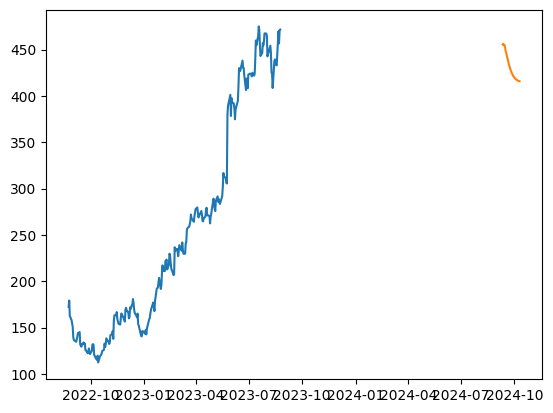

In [60]:
# Visualizing our Future 30 Days predictions
plt.plot(df['Date'][-252:], tf.squeeze(scaler.inverse_transform(test_data)))
plt.plot(date_array, tf.squeeze(predictions))

## Saving our model

In [61]:
lstm_model.save('NVIDIA_lstm_model.h5')

In [62]:
import pickle
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)